## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [7]:
pip install pandas_datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
     ---------------------------------------- 3.6/3.6 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 62.8/62.8 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 140.4/140.4 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 61.5/61.5 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [5]:
seaborn.__version__

'0.12.0'

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [2]:
from pandas_datareader import DataReader
from datetime import datetime

df = DataReader('AAPL', 'yahoo', start = datetime(2017, 1, 1), end = datetime(2018, 12, 31))
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.219833
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.189367
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.327635
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.632290
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.885386


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

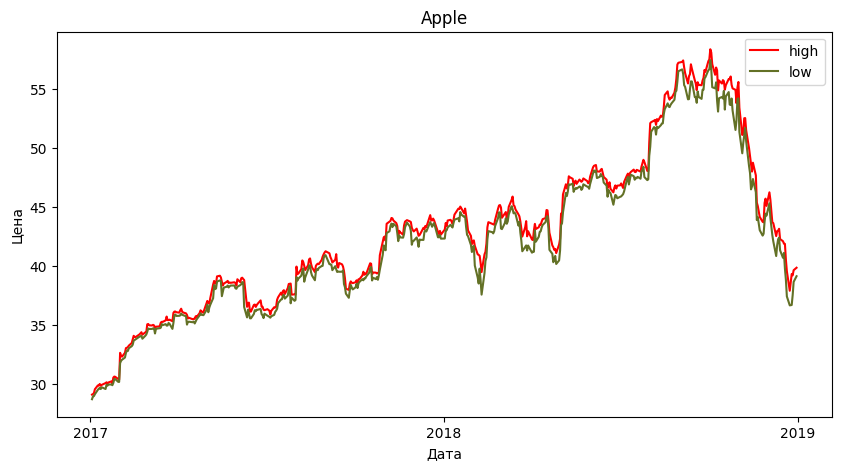

In [3]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))

ax.plot(df['High'], c = 'red', label = 'high')
ax.plot(df['Low'], c = '#637126', label = 'low')
ax.legend()
ax.set_xlabel('Дата')
ax.set_ylabel('Цена')
ax.set_title('Apple')

ax.xaxis.set_major_locator(mdates.YearLocator())

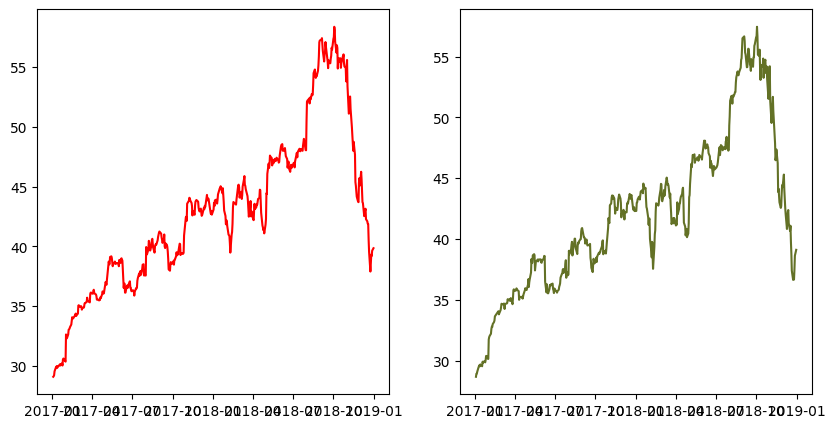

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.plot(df['High'], c = 'red', label = 'high')
ax2.plot(df['Low'], c = '#637126', label = 'low')

Text(0.5, 1.0, 'S')

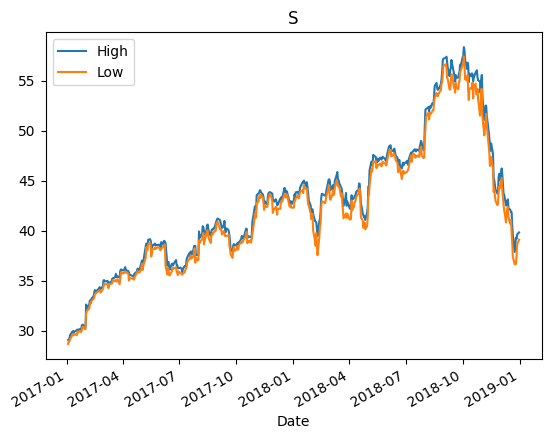

In [5]:
ax = df[['High', 'Low']].plot.line()

ax.set_title('S')

In [6]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.219833
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.189367
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.327635
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.632290
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.885386
...,...,...,...,...,...,...
2018-12-24,37.887501,36.647499,37.037498,36.707500,148676800.0,35.487965
2018-12-26,39.307499,36.680000,37.075001,39.292500,234330000.0,37.987076
2018-12-27,39.192501,37.517502,38.959999,39.037498,212468400.0,37.740551


<AxesSubplot: xlabel='High', ylabel='year'>

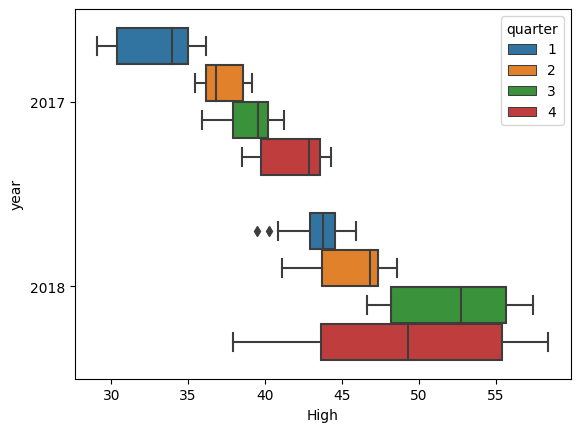

In [7]:
df['year'] = df.index.year.astype(str)
df['quarter'] = df.index.quarter.astype(str)

sns.boxplot(data = df, x = "High", y = 'year', hue = 'quarter')

## Лабораторная работа №5

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 31.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня, по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [8]:
data = pd.DataFrame(np.load('C:\\Users\\Вячеслав\\Desktop\\Учёба\\ТОБД\\Семинар 6\\average_ratings.npy'))
data

,0,1,2,3,4,5,6,7,8,9,...,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094
0,5.0,5.013103,5.026240,5.013103,5.000000,4.986932,5.000000,5.013103,5.000000,4.986932,...,5.451021,5.436773,5.451021,5.465305,5.479627,5.493987,5.508384,5.522819,5.537292,5.522819
1,7.0,6.970750,7.000000,6.970750,6.941621,6.970750,7.000000,6.970750,7.000000,7.029373,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
2,3.0,2.996861,2.993725,2.996861,3.000000,2.996861,2.993725,2.996861,2.993725,2.996861,...,2.984338,2.981216,2.984338,2.981216,2.984338,2.987464,2.990593,2.993725,2.990593,2.987464


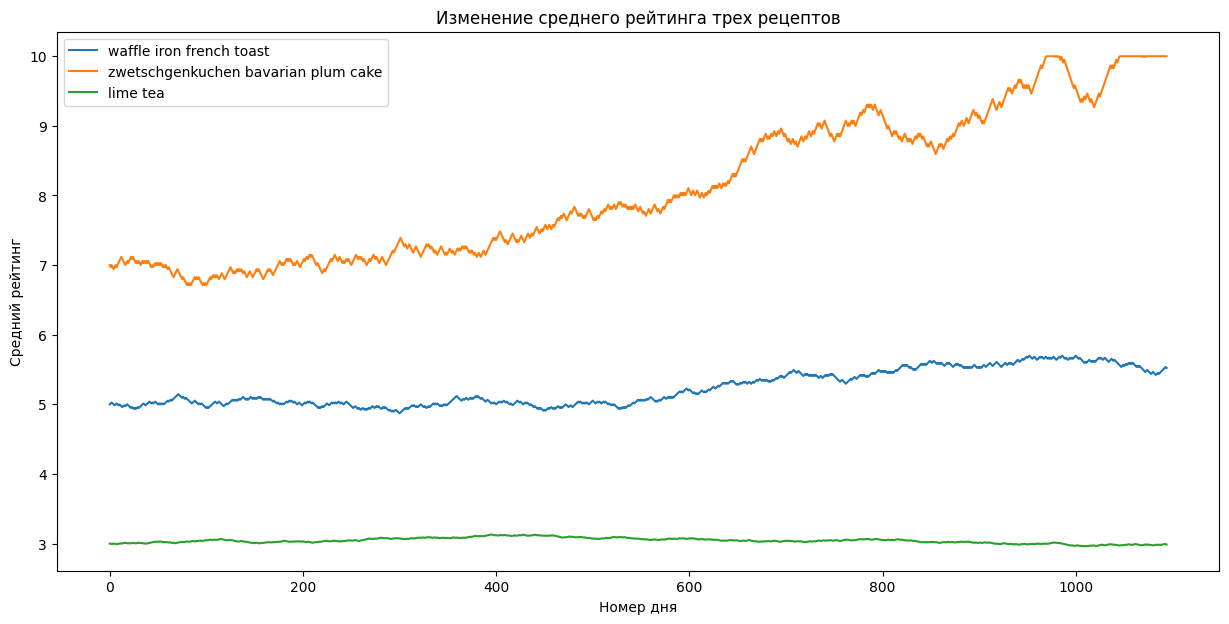

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))

ax.plot(data.iloc[0], label = 'waffle iron french toast')
ax.plot(data.iloc[1], label = 'zwetschgenkuchen bavarian plum cake')
ax.plot(data.iloc[2], label = 'lime tea')

ax.legend(loc = 'upper left')
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')


plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 31.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [10]:
data_years = data.copy()
data_years.columns = pd.to_datetime(pd.date_range(start = datetime(2019, 1, 1), end = datetime(2021, 12, 30)).strftime('%Y-%m-%d'), format = '%Y-%m-%d')

data_years.columns

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', length=1095, freq=None)

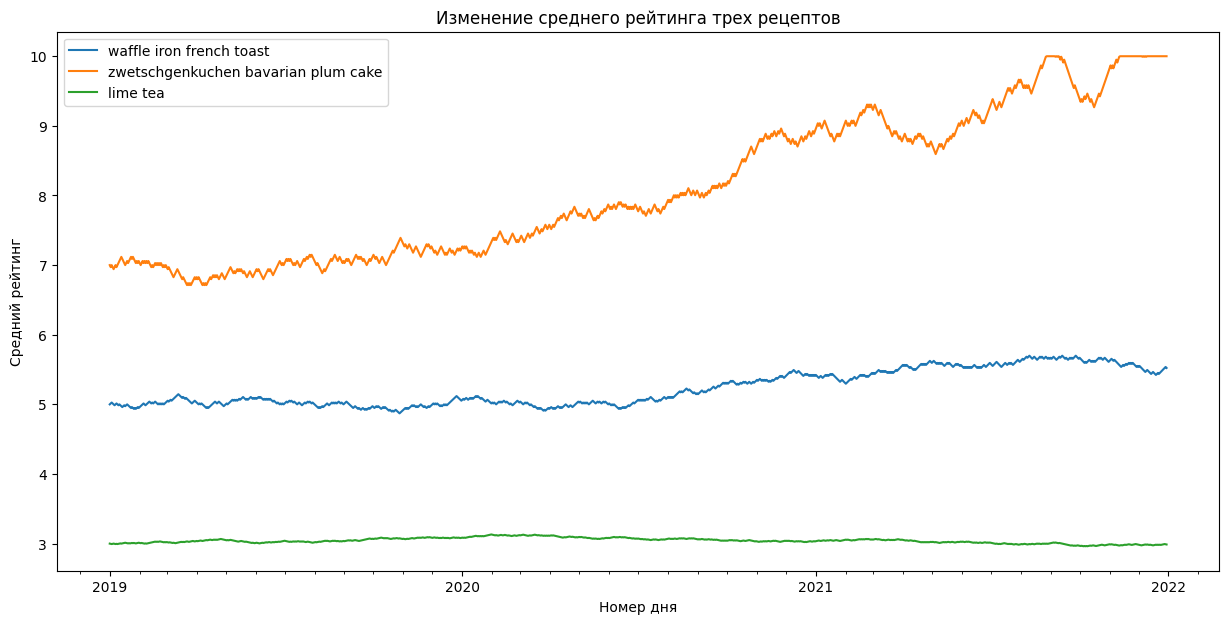

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))

ax.plot(data_years.iloc[0], label = 'waffle iron french toast')
ax.plot(data_years.iloc[1], label = 'zwetschgenkuchen bavarian plum cake')
ax.plot(data_years.iloc[2], label = 'lime tea')

ax.legend(loc = 'upper left')
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

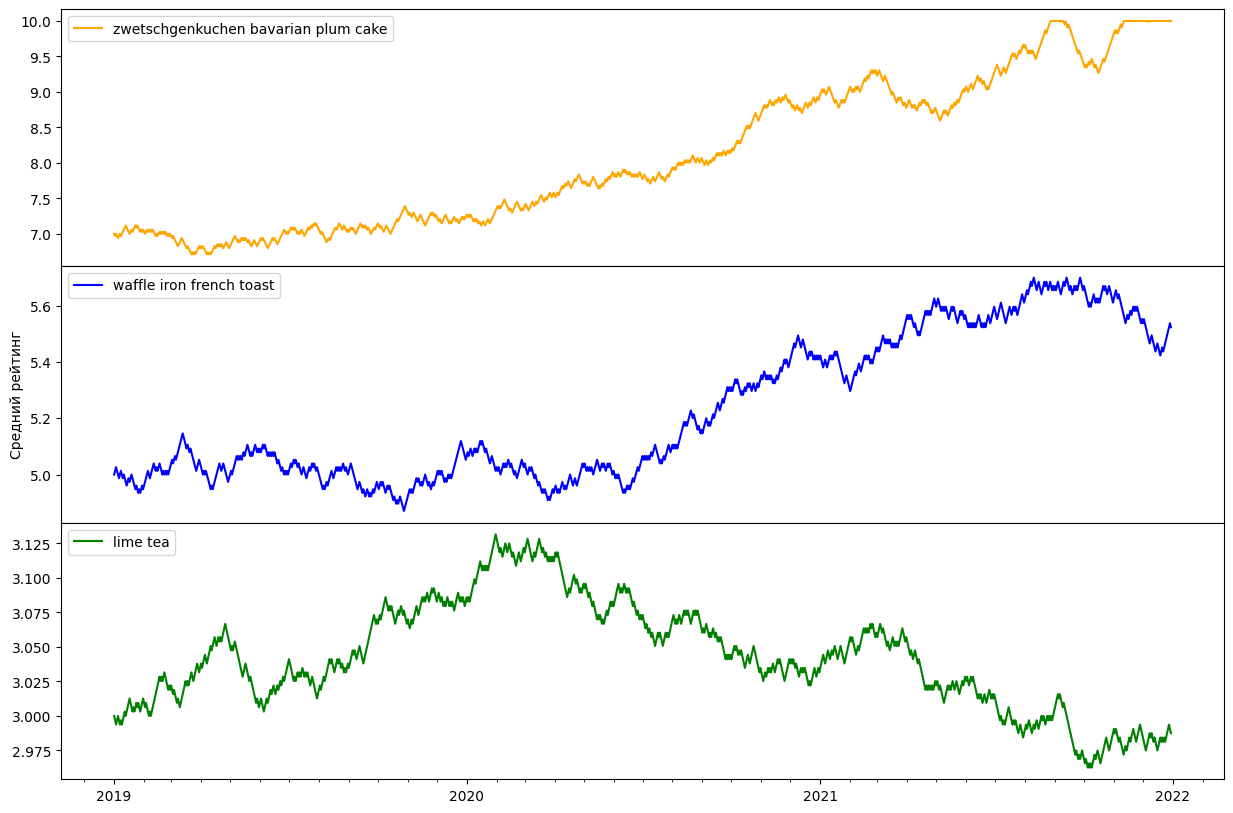

In [19]:
fig, axes = plt.subplots(3, 1, sharex = True, figsize = (15, 10))
plt.subplots_adjust(hspace = 0)

label = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']
color = [ 'blue', 'orange', 'green']
order = [1, 0, 2]

for i in range(3):
    axes[order[i]].plot(data_years.iloc[i], label = label[i], color = color[i])
    
    axes[order[i]].legend(loc = 'upper left')
    #axes[i].set_xlabel('Номер дня')
    if i == 1:
        axes[i].set_ylabel('Средний рейтинг')
    #axes[i].set_title('Изменение среднего рейтинга трех рецептов')
    
axes[2].xaxis.set_major_locator(mdates.YearLocator())
axes[2].xaxis.set_minor_locator(mdates.MonthLocator())

plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [21]:
visitors = np.load('C:\\Users\\Вячеслав\\Desktop\\Учёба\\ТОБД\\Семинар 6\\visitors.npy')
visitors

array([2311, 2023, 1839, 1523, 1371, 1217, 1098,  958,  862,  724,  654,
        558,  526,  454,  383,  372,  356,  274,  239,  236,  214,  179,
        180,  140,  138,  112,  102,  101,   74,   81,   70,   74,   53,
         57,   52,   44,   38,   30,   37,   27,   20,   21,   16,   16,
         12,    9,   13,   10,   13,    7,    5,    8,    6,    8,    9,
          4,    3,    4,    4,    2,    2,    3,    2,    2,    2,    2,
          2,    3,    2,    2,    3,    2,    2,    2,    2,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2])

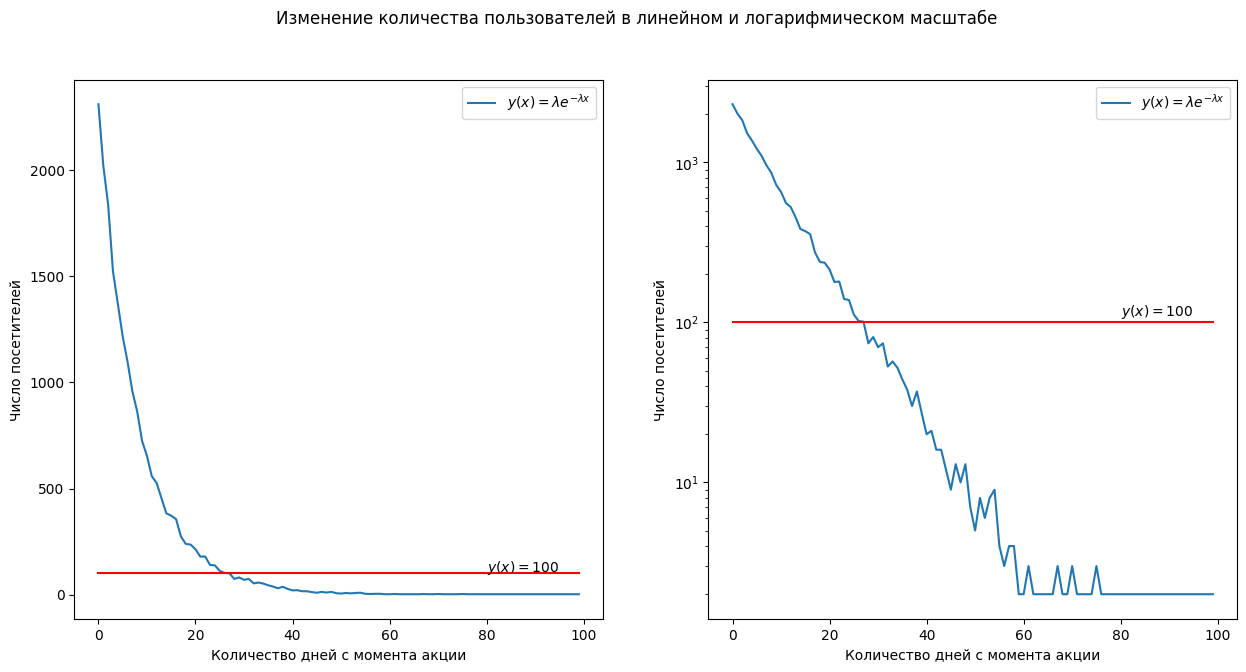

In [137]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7))

ax1.plot(visitors, label = '$y(x)={\lambda}e^{−{\lambda}x}$')
ax1.plot([100] * len(visitors), color = 'r')

ax1.annotate('$y(x)=100$', xy=(80, 110), xycoords='data')
ax1.set_xlabel('Количество дней с момента акции')
ax1.set_ylabel('Число посетителей')
ax1.legend(loc = 'upper right')



ax2.plot(visitors, label = '$y(x)={\lambda}e^{−{\lambda}x}$')
ax2.set_yscale('log')
ax2.plot([100] * len(visitors), color = 'r')

ax2.annotate('$y(x)=100$', xy=(80, 110), xycoords='data')
ax2.legend(loc = 'upper right')
ax2.set_xlabel('Количество дней с момента акции')
ax2.set_ylabel('Число посетителей')

fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')
plt.show()

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [102]:
recipes = pd.read_csv('recipes_sample.csv', parse_dates = ['submitted'])
reviews = pd.read_csv('reviews_sample.csv', index_col = 0)

In [106]:
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,length_type
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,длинный
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,средний
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,средний
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,средний
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,средний
...,...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0,длинный
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0,длинный
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN,длинный
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,длинный


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [110]:
def speed(x) -> str:
    #print(x)
    if x < 5:
        return 'короткий'
    elif x < 50:
        return 'средний'
    else:
        return 'длинный'

    

recipes['length_type'] = recipes['minutes'].apply(speed)
recipes.head(5)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,length_type
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,длинный
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,средний
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,средний
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,средний
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,средний


In [119]:
first_ser = recipes.groupby('length_type').count()
second_ser = recipes.groupby('length_type').mean()

second_ser

C:\Users\Вячеслав\AppData\Local\Temp\ipykernel_9944\576472914.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  second_ser = recipes.groupby('length_type').mean()


,id,minutes,contributor_id,n_steps,n_ingredients
length_type,,,,,
длинный,216598.133043,277.654719,5.677347e+06,11.917290,10.233398
короткий,205147.669630,1.918519,5.630701e+06,4.990431,5.572614
средний,226035.509740,25.324644,5.608516e+06,8.581922,8.330380


Text(0.5, 1.0, 'Размеры групп рецептов')

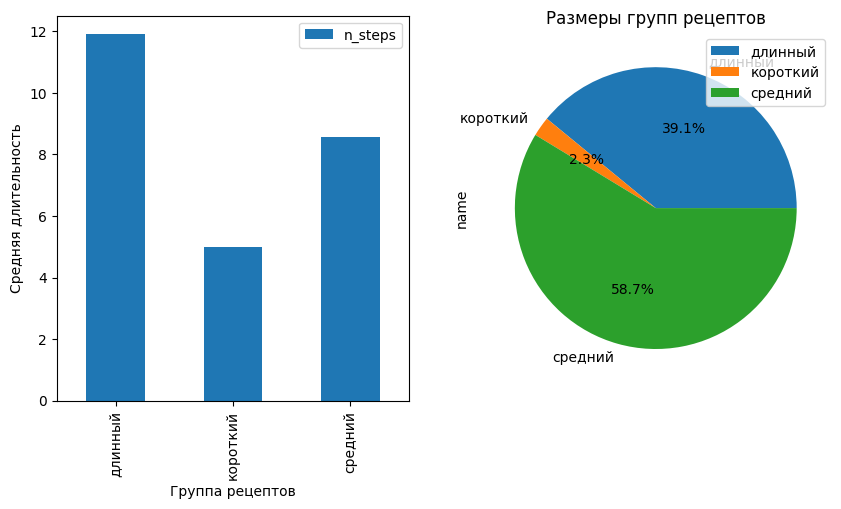

In [124]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
first_ser.plot(y = 'name', kind = 'pie', ax = ax2, autopct = '%1.1f%%')
second_ser.plot(y = 'n_steps', kind = 'bar', ax = ax1)


ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Средняя длительность')
ax2.set_title('Размеры групп рецептов')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [125]:
reviews['date'] = pd.to_datetime(reviews['date'], format = '%Y-%m-%d')
reviews['year'] = reviews['date'].dt.year

In [126]:
reviews_2008 = reviews[(reviews['year'] == 2008)]
reviews_2009 = reviews[(reviews['year'] == 2009)]

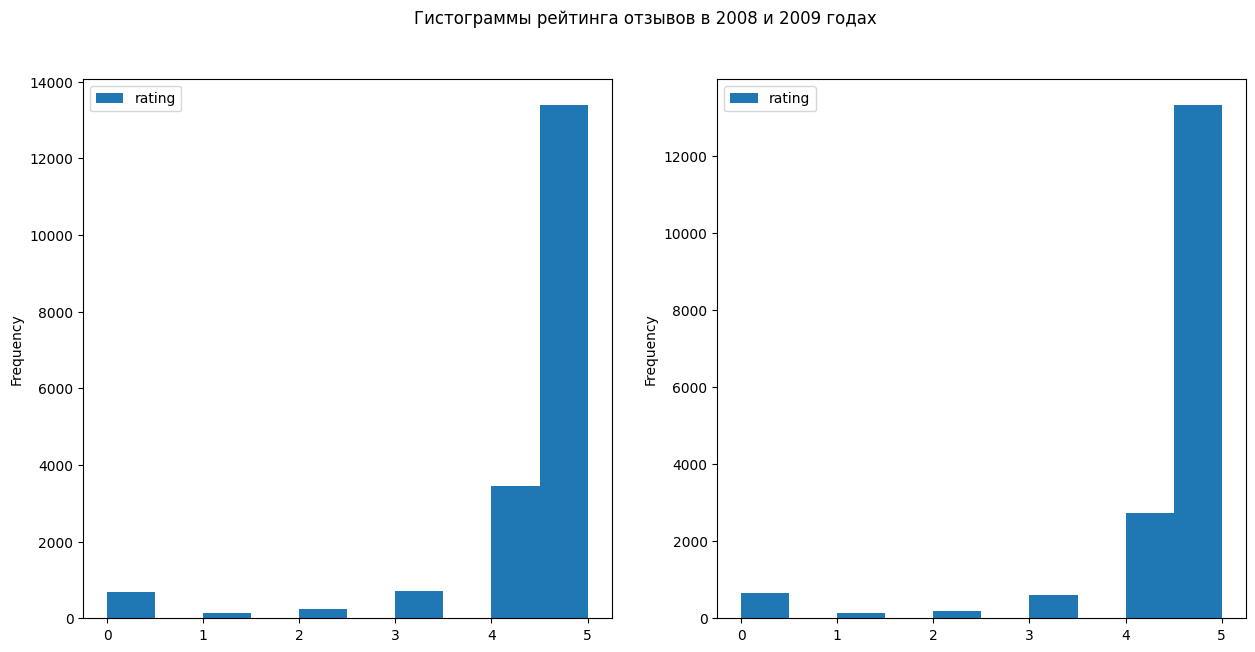

In [128]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7))
reviews_2008.plot(y = 'rating', kind = 'hist', ax = ax1)
reviews_2009.plot(y = 'rating', kind = 'hist', ax = ax2)
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах');

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

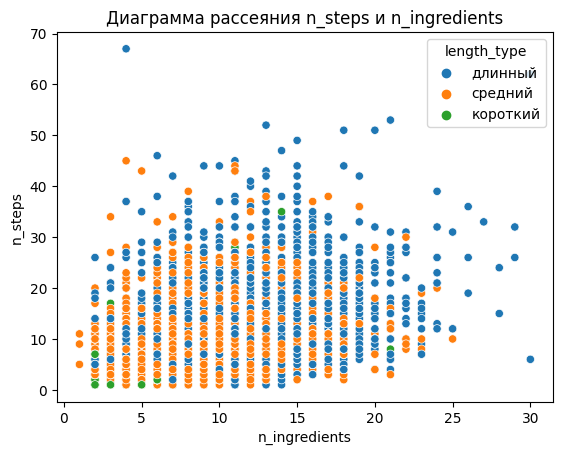

In [130]:
rel = sns.scatterplot(data = recipes, 
                      x = 'n_ingredients', 
                      y='n_steps', 
                      hue = 'length_type').set(title = 'Диаграмма рассеяния n_steps и n_ingredients')

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [131]:
new_recipes = recipes.merge(reviews, left_on = 'id', right_on = 'recipe_id')
new_recipes.head(5)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,length_type,user_id,recipe_id,date,rating,review,year
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,длинный,743566,44123,2008-01-28,5,I lived in San Diego for 19 years and would g...,2008
1,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,длинный,76503,44123,2003-06-03,5,This soup is the Bomb! Don't hesitate to try.....,2003
2,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,длинный,34206,44123,2003-03-23,5,I just can't say enough about how wonderful th...,2003
3,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,средний,494084,67664,2012-09-26,5,These are great! I use 100% (organic) juice a...,2012
4,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,средний,303445,67664,2012-03-31,5,"Very, very good. My son loves these. He like...",2012


[Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')]

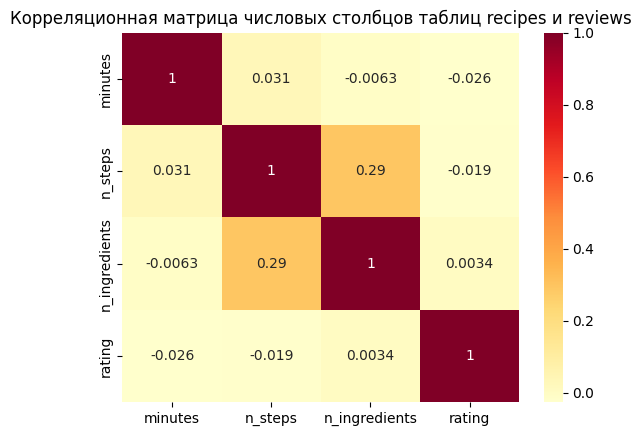

In [136]:
sns.heatmap(data = new_recipes[['minutes','n_steps','n_ingredients','rating']].corr(), 
            cmap = "YlOrRd", 
            annot = True).set(title = 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')